<a href="https://colab.research.google.com/github/pauloigorms/covid-twitter-pecd/blob/main/Programacao_Ciencia_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROGRAMA√á√ÉO PARA CI√äNCIA DE DADOS**

**Equipe**: C√°ssio de Paula / Paulo Moraes [(website)](https://paulomoraes.me).

**Objetivo**: *analisar as mensagens
trocadas por usu√°rios do Twitter sobre a COVID-19, com o intuito de realizar uma an√°lise
explorat√≥ria e visualiza√ß√£o de dados, passando tamb√©m pelas etapas de limpeza e organiza√ß√£o.
Mais especificamente, as equipes devem explorar a an√°lise nas perguntas (quest√µes) dos usu√°rios,
pois arguimos que seja um tipo de mensagem apropriado para se compreender as principais d√∫vidas
das pessoas sobre a atual pandemia.*


# **INFORMA√á√ïES GERAIS**


**ARTEFATOS**

*   Relat√≥rio T√©cnico - *Um notebook com o texto e o c√≥digo-fonte apresentado na ferramenta Google COLAB*; 
*   Reposit√≥rio no GitHub.


**ATIVIDADES**

*   Importar base de dados;
*   Tratar base de dados;
*   Identificar as perguntas (quest√µes) descritas nas mensagens;
*   Salvar cole√ß√£o com a identifica√ß√£o das perguntas em um novo dataset chamado "DuvidasDB".


**DO RESULTADO**

1.   Devem apresentar um resumo (sum√°rio) com as estat√≠sticas dos dados originais, elas podem ser apresentadas atrav√©s de tabelas e/ou gr√°ficos;
2.   Com a cole√ß√£o resultando da identifica√ß√£o das perguntas a equipe deve apresentar as estat√≠sticas sobre estes dados.


**TEMAS DISCUTIDOS**

As equipes devem fazer uma an√°lise sobre os temas que s√£o debatidos nas perguntas dos postadas pelos usu√°rios. Fa√ßa uma an√°lise se as perguntas s√£o relativas aos seguintes temas:

*   Doen√ßa. Quando a pergunta √© relativa √† doen√ßa Deve-se observar que a doen√ßa √© identificada por v√°rios nomes. Exemplo: coronav√≠rus, corona, COVID-19, etc;
*   Medicamento. Quando a pergunta √© sobre o uso de determinado medicamento no tratamento da doen√ßa;
*   Organiza√ß√µes. Quando a pergunta √© relativa a uma determinada entidade ou organiza√ß√£o. Emissora de TV, Minist√©rio da Sa√∫de ou empresas s√£o exemplos de organiza√ß√µes;
*   Pessoas. Quando a pergunta √© sobre determinada pessoa. Por exemplo, a pergunta pode ser sobre a atua√ß√£o que determinado pol√≠tico ou pessoa famosa teve durante esse per√≠odo de pandemia.



**VIS√ÉO DOS DADOS**

> **Vis√£o Temporal** - Deve-se fazer uma an√°lise temporal das perguntas que formam o dataset *DuvidasDB*. Pode-se considerar o intervalo temporal de dias, semanas ou meses. A escolha do intervalo de tempo ficar√° a cargo das equipes. Exemplos de an√°lise temporal: a) houve um aumento no n√∫mero de perguntas
ao longo do tempo? b) houve uma mudan√ßa no perfil das perguntas ao longo do tempo?

> **Vis√£o Geogr√°fica** - Deve-se fazer uma an√°lise geogr√°fica (espacial) das perguntas que formam o dataset *DuvidasDB*. Existem algumas colunas no dataset que trazem a informa√ß√£o das localiza√ß√µes como, por exemplo, o pa√≠s, estado e cidade. Em alguns tu√≠tes √© poss√≠vel ainda identificar as coordenadas geogr√°ficas
de latitude e longitude. Exemplo de an√°lise geogr√°fica: a) os usu√°rios de regi√µes diferentes fazem
perguntas com diferentes focos? Por exemplo, ser√° que os usu√°rios de uma regi√£o perguntam mais
sobre a doen√ßa ou sobre o tratamento? Essa an√°lise ainda pode ser realizada em diversos n√≠veis de
√°rea (cidade, estado ou regi√£o). Al√©m de apresentar a distribui√ß√£o das d√∫vidas dos usu√°rios por
regi√£o, a equipe dever√° fazer uma an√°lise dessa distribui√ß√£o. Por exemplo, apresentar as raz√µes
(ou hip√≥teses) da ocorr√™ncia dessa distribui√ß√£o.

# **INICIANDO O PROJETO**

IMPORTANDO LIBS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

import nltk as nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from nltk.stem import rslp

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

from wordcloud import WordCloud, ImageColorGenerator
from sklearn.decomposition import PCA

import re as rexpression
from string import punctuation
import unicodedata

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


LEITURA DO ARQUIVO DE DADOS BASE

In [ ]:
drive.mount('/content/drive')
load_data = pd.read_csv('drive/My Drive/twitter/dados-curso-completo.csv', sep= ',',skiprows=0, encoding='utf-8')

duvidas_file = pd.read_csv('drive/My Drive/twitter/duvidasdb.csv', sep= ',',skiprows=0, encoding='utf-8')
texto_classificado = pd.read_csv('drive/My Drive/twitter/texto_classificado_v1.csv', sep= ',',skiprows=0, encoding='utf-8')

raw_data = load_data.drop_duplicates(['texto'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Estat√≠sticas bases**


**Exemplo da base de dados**

---



In [ ]:
raw_data.head(1)

data   usuario  apelido  ... latitude  longitude  hashtags
0  2020-03-23 18:51:14  Gaboardi  fraslee  ...      NaN        NaN        []

[1 rows x 13 columns]

In [ ]:
raw_data.dtypes

data           object
usuario        object
apelido        object
texto          object
retweet         int64
seguidores      int64
idioma         object
lugar          object
pais           object
sigla          object
latitude      float64
longitude     float64
hashtags       object
dtype: object

**Tamanha da base (com e sem dados duplicados)**

---

In [ ]:
print("Total de dados (com duplicados): ", decimaled(load_data.texto.count()), " completo[", load_data.texto.count(), "]" )

In [ ]:
print("Total de dados (sem duplicados): ", decimaled(raw_data.texto.count()), " completo[", raw_data.texto.count(), "]" )

Total de dados (sem duplicados):  1.65M  completo[ 1653599 ]


**Twitters por regi√£o**

---

In [ ]:
print("Total de twitters com localiza√ß√£o: ", decimaled(raw_data['lugar'].count()), " completo[", raw_data['lugar'].count(),"]")

Total de twitters com localiza√ß√£o:  74.4K  completo[ 74383 ]


In [ ]:
print("Percentual em rela√ß√£o √† base: ", percentual(value=raw_data['lugar'].count(), total=raw_data.texto.count()))

Percentual em rela√ß√£o √† base:  4.50%


In [ ]:
raw_data[raw_data.pais == 'Brazil'].groupby('pais').count()

data  usuario  apelido  texto  ...  sigla  latitude  longitude  hashtags
pais                                    ...                                      
Brazil  67034    67033    67034  67034  ...  67034      7675       7675     67034

[1 rows x 12 columns]

In [ ]:
raw_data[raw_data.pais == 'Brazil'].groupby(['pais', 'lugar']).count().tail(2)

data  usuario  apelido  ...  latitude  longitude  hashtags
pais   lugar                                  ...                               
Brazil √ârico Cardoso     1        1        1  ...         1          1         1
       √ìbidos            2        2        2  ...         0          0         2

[2 rows x 11 columns]

**Twitters por per√≠odo**

---

In [ ]:
df_data = pd.DataFrame(raw_data)
df_data['data'] = pd.to_datetime(df_data['data'])
dt_format = df_data
df_data.index = df_data['data']
df_data.drop('data', inplace=True, axis=1)

df_res = df_data.resample('M').count()
df_res.reset_index(inplace=True)

df_res

data  usuario  apelido   texto  ...  sigla  latitude  longitude  hashtags
0 2020-01-31    54388    54391   54391  ...   2177        80         80     54391
1 2020-02-29   109485   109489  109489  ...   4305       225        225    109489
2 2020-03-31   480112   480128  480128  ...  23484      2561       2561    480128
3 2020-04-30   469321   469334  469334  ...  21315      2516       2516    469334
4 2020-05-31   283219   283229  283229  ...  12777      1993       1993    283229
5 2020-06-30   257022   257027  257027  ...  10315      1345       1345    257027
6 2020-07-31        1        1       1  ...      0         0          0         1

[7 rows x 13 columns]

Text(0, 0.5, 'M√™s 2020')

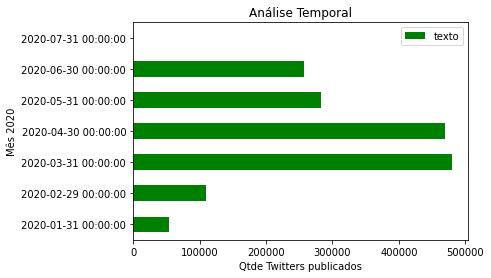

In [ ]:
graph = df_res.plot(kind='barh',x='data',y='texto', title="An√°lise Temporal", color="green")
graph.set_xlabel("Qtde Twitters publicados")
graph.set_ylabel("M√™s 2020")

**Twitters por Hashtag**

---

In [ ]:
raw_data[raw_data.pais == "Brazil"].groupby('hashtags').count().head(5)

data  ...  longitude
hashtags                                                  ...           
['100vezesgauch√£o']                                    1  ...          0
['1290am', 'Zilh√µesDeCoisas']                          1  ...          0
['14Abril', 'apocalypse2020', 'auxiloemergencial']     1  ...          0
['1milhaodemortos', 'BolsonaroGenocida', 'Parab...     1  ...          0
['2019_nCoV']                                          1  ...          0

[5 rows x 12 columns]

**Hashtags**

---

In [ ]:
master_tags = []
#for index, item in raw_data.iterrows():
#  master_tags = master_tags + item.hashtags.strip('][').split(', ') 

raw_data[raw_data.hashtags.str.contains("corona")].count()

data          31259
usuario       31259
apelido       31259
texto         31259
retweet       31259
seguidores    31259
idioma        31259
lugar          2346
pais           2345
sigla          2345
latitude        753
longitude       753
hashtags      31259
dtype: int64

# **PROCESSAMENTO**

**MINERANDO PERGUNTAS**


Extraindo perguntas

In [ ]:
twitter = []
perguntas = []
erro = []
for i in range(0, len(raw_data)):
  try:
    twitter.append(sent_tokenize(raw_data[i]))   #twitter √© uma lista de frases/senten√ßas
    for sentencas in twitter: #percorro todas as senten√ßas
      for row in sentencas:
        palavras = word_tokenize(row.lower()) #quebra a senten√ßa em palavras e pontua√ß√µes
        for palavra in palavras:
          if palavra == '?':
            perguntas.append([row,i]) 
            break #em uma sente√ßa pode ter vario pontos de interroga√ß√£o, ent√£o logo no primeiro '?' ele recupera a senten√ßa e sai dessa itera√ß√£o
    twitter.clear()#libera a lista de senten√ßas atual/ pois o objetivo era apenas percorrer o registro e n√£o persistir o twitter a cada itera√ß√£o 
  except:
    erro.append(i)

# ARMAZENANDO EM CSV
# df_DuvidasDB = pd.DataFrame(perguntas, columns=['Perguntas','Indice'])
# df_DuvidasDB.to_csv(r'drive/My Drive/twitter/duvidasdb.csv', index = False)

Classificando perguntas

In [ ]:
medicamentos = ['cloroquina', 'hidroxicloroquina', 'cha de boldo', 'cha de alho', 'remdesivir', 'azitromicina', 'remedio'] 
pessoas = ['bolsonaro', 'bolsonarosp', 'henrique mandetta', 'eduardo pazuello', 'jair bolsonaro', 'Nelson Teich', 'atila iamarino', 'paulo guedes', 'donald trump', 'trump']
doencas = ['corona','corona virus', 'virus', 'pandemia', 'epidemia', 'covid', 'covid-19', 'coronav√≠rus']
organizacoes = ['globo', 'tvglobo', 'cnn', 'ministerio da saude', 'stf', 'estadao', 'folha de sao paulo', 'isto √©', 'jovem pan', 'jp', 'jornal nacional', 'jornal do amazonas', 'jornal', 'tv', 'radio', 'o globo', 'facebook', 'twitter', 'jornal da globo', 'minist√©rio da sa√∫de', 'onu']

desclassi = []
perguntas_class = []
erro_class = []
for i in range(0, len(duvidas_file['Perguntas'])):
  try:
    desclassi.append(sent_tokenize(duvidas_file['Perguntas'][i]))   
    for sentencas in desclassi: 
      for row in sentencas:
        palavras = word_tokenize(row.lower()) 
        palavras.reverse()
        for palavra in palavras:
          if palavra in medicamentos:
            perguntas_class.append([duvidas_file['Perguntas'][i],i,1]) 
            break 
          if palavra in pessoas:
            perguntas_class.append([duvidas_file['Perguntas'][i],i,2]) 
            break 
          if palavra in doencas:
            perguntas_class.append([duvidas_file['Perguntas'][i],i,3]) 
            break  
          if palavra in organizacoes:
            perguntas_class.append([duvidas_file['Perguntas'][i],i,4]) 
            break        
    desclassi.clear()
  except:
    erro_class.append(i)

#df_DuvidasDBTema = pd.DataFrame(perguntas_class, columns=['Perguntas','Indice','Tema'])
#df_DuvidasDBTema.to_csv(r'drive/My Drive/twitter/duvidasdbClassi.csv', index = False)

# **ANALISANDO A CLASSIFICA√á√ÉO**

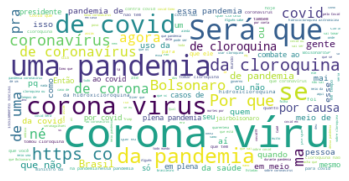

In [ ]:
perguntas = " ".join(twitter for twitter in texto_classificado.Perguntas)
wordcloud = WordCloud(background_color="white").generate(perguntas)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
texto_classificado['data'] = np.nan
texto_classificado['pais'] = np.nan
texto_classificado['usuario'] = np.nan
texto_classificado['retweet'] = np.nan
texto_classificado['seguidores'] = np.nan

for index in texto_classificado.index:
  texto_classificado.loc[index, 'data'] = raw_data.iloc[index]['data']
  texto_classificado.loc[index, 'pais'] = raw_data.iloc[index]['pais']
  texto_classificado.loc[index, 'usuario'] = raw_data.iloc[index]['usuario']
  texto_classificado.loc[index, 'retweet'] = raw_data.iloc[index]['retweet']  
  texto_classificado.loc[index, 'seguidores'] = raw_data.iloc[index]['seguidores']

In [ ]:
texto_classificado.head(5)

Perguntas  ...  seguidores
0             @BolsonaroSP Cade o fund√£o deputado???  ...       138.0
1       Fuma√ßa de cigarro pode propagar coronav√≠rus?  ...        56.0
2  @JoseMedeirosMT Seria isso algum tipo aleat√≥ri...  ...         5.0
3  "Nova York √© o novo epicentro da pandemia de c...  ...      1885.0
4  @mitags Ser√° por que o Bolsonaro n√£o fez propa...  ...       124.0

[5 rows x 8 columns]

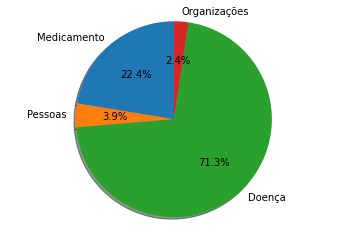

In [ ]:
valores = texto_classificado.groupby('Tema').count().Perguntas

labels = ['Medicamento', 'Pessoas', 'Doen√ßa', 'Organiza√ß√µes']
quants = [valores[1], valores[2], valores[3], valores[4]]


# criando representa√ß√£o
fig1, ax1 = plt.subplots()


# gr√°fico pizza
ax1.pie(quants, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
# wedges, texts, autotexts = ax1.pie(quants, autopct=lambda pct: wedges(pct, quants), textprops=dict(color="w"))
# ax1.legend(wedges, labels, title="Classifica√ß√µes", loc="center left", bbox_to_anchor=(1,0,0.5,1))
# ax1.setp(autotexts, size=8, weight="bold")
# ax1=set_title("Contextualiza√ß√£o Perguntas")

# gr√°fico de linha
# plt.plot(labels, quants)
# plt.xlabel('Classes')
# plt.ylabel('Qtde Perguntas')
# plt.title('Contextualiza√ß√£o das Perguntas')

# apresenta gr√°fico
plt.show()

In [ ]:
valores = texto_classificado.groupby('Tema').count()
x = ['Medicamento', 'Pessoas', 'Doen√ßa', 'Organiza√ß√µes']
y = [valores[1], valores[2], valores[3], valores[4]]
plt.plot(x, y)
plt.xlabel('Classes')
plt.ylabel('Qtde Perguntas')
plt.title('Contextualiza√ß√£o das Perguntas')
plt.show()

# **I.A?**

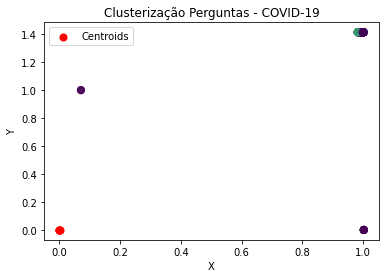

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True)
vectorizer = vectorizer.fit_transform(text_processed)

kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 30).fit(vectorizer)
predict = kmeans.predict(vectorizer)

labels = kmeans.labels_
distance = kmeans.fit_transform(vectorizer)

plt.scatter(distance[:, 0], distance[:,1], s = 50, c = labels, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red', label = 'Centroids')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, color = 'black', alpha=0.5)
plt.title('Clusteriza√ß√£o Perguntas - COVID-19')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Fun√ß√µes p√∫blicas

Fun√ß√£o: **C√°lcular Percente**

In [ ]:
def percentual(value, total):
    if not value and not total: 
       return print("value = 0% \n total = 0%") 
    elif value < 0 or total < 0: 
       return print("n√£o aceita valor negativo!") 
    else: 
       return '{0:.2f}%'.format((value / total * 100))

Fun√ß√£o: **Formatar para configura√ß√£o decimal**

In [ ]:
def decimaled(value):
  value = float('{:.3g}'.format(value))
  size = 0
  while abs(value) >= 1000:
    size += 1
    value /= 1000.0
  return '{}{}'.format('{:f}'.format(value).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][size])

Fun√ß√£o: **Tokeniza√ß√£o**

In [ ]:
 def tokenize(sentence):
  words = sentence.split()
  tclean = []
  for word in words:
    nfkd = unicodedata.normalize('NFKD', word)
    noaccent = u''.join([r for r in nfkd if not unicodedata.combining(r)])
    join = rexpression.sub('[^a-zA-Z \\\]',' ', noaccent)
    tclean.append(join.lower().strip())
  return ' '.join([r for r in tclean if len(r) > 1 and not r.isdigit()])

Fun√ß√£o: **Remover stopwords**

In [ ]:
def rm_stopwords(sentence):
  words = sentence.split()
  swords = stopwords.words('portuguese')
  return [r for r in words if r.lower().strip() not in swords] 

Fun√ß√£o: **Reduzir as palavras ao seu radical**

In [ ]:
def stemming(words):
  stm = []
  for word in words:
    stm.append(rslp.RSLPStemmer().stem(word))
  return stm

Fun√ß√£o: **Minera√ß√£o de texto**

In [ ]:
def mining_text(frame):
  result = []
  for index, question in frame.iterrows():
    item = tokenize(question.Perguntas)
    item = rm_stopwords(item)
    #item = stemming(item)
    result.append(item)
  return result

Fun√ß√£o: **Gerar wedges**

In [ ]:
def wedges(pct, values):
  absolute = int(pct/100.*np.sum(values))
  return '{:1.1f}%\n{:d}'.format(pct, absolute)